In [1]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

In [3]:
data = fetch_olivetti_faces()

features = data.data
targets = data.target

print(features.shape)

(400, 4096)


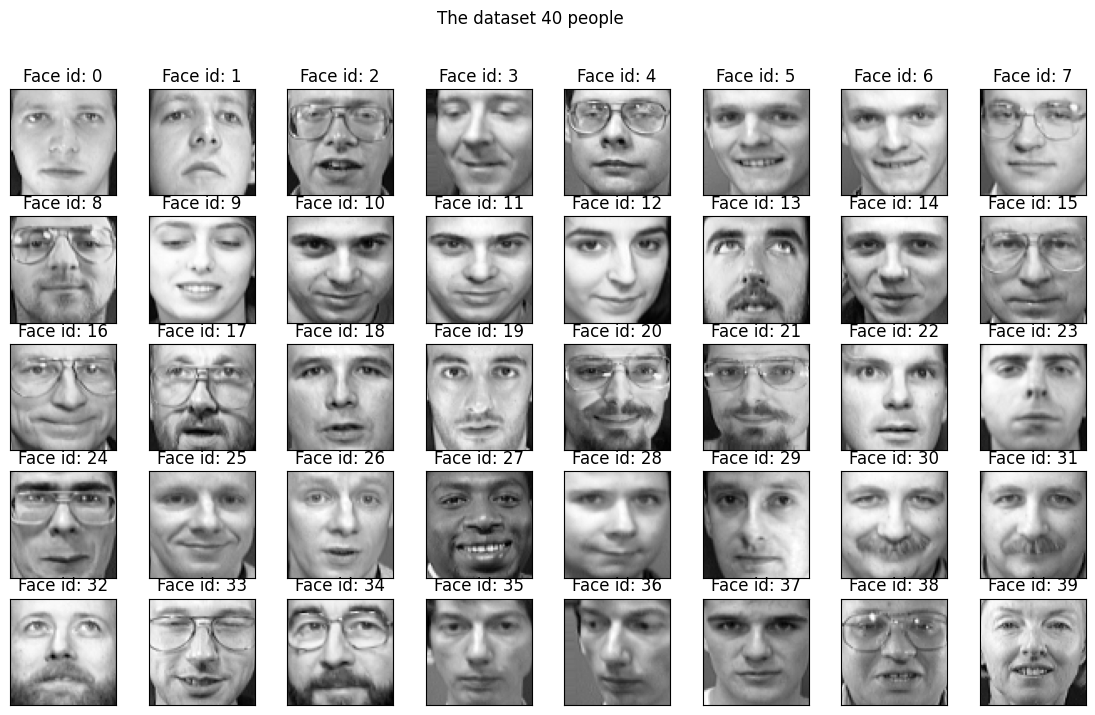

In [12]:
fig, sub_plots = plt.subplots(nrows=5, ncols=8, figsize=(14,8))
sub_plots = sub_plots.flatten()
for unique_user_id in np.unique(targets):
    image_index = unique_user_id * 8
    sub_plots[unique_user_id].imshow(features[image_index].reshape(64,64), cmap='gray')
    sub_plots[unique_user_id].set_xticks([])
    sub_plots[unique_user_id].set_yticks([])
    sub_plots[unique_user_id].set_title("Face id: %s" % unique_user_id)

plt.suptitle("The dataset 40 people")
plt.show()

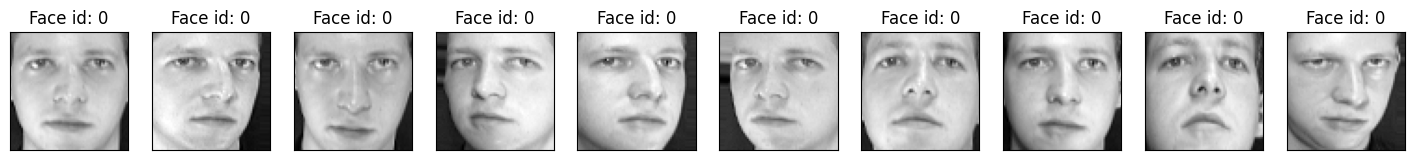

In [13]:
fig, sub_plots = plt.subplots(nrows=1, ncols=10, figsize=(18,9))

for j in range(10):
    sub_plots[j].imshow(features[j].reshape(64,64), cmap='gray')
    sub_plots[j].set_xticks([])
    sub_plots[j].set_yticks([])
    sub_plots[j].set_title("Face id: 0")

plt.show()

In [14]:
X_train,X_test,y_train,y_test = train_test_split(features,targets,test_size=0.25,stratify=targets, random_state=42)

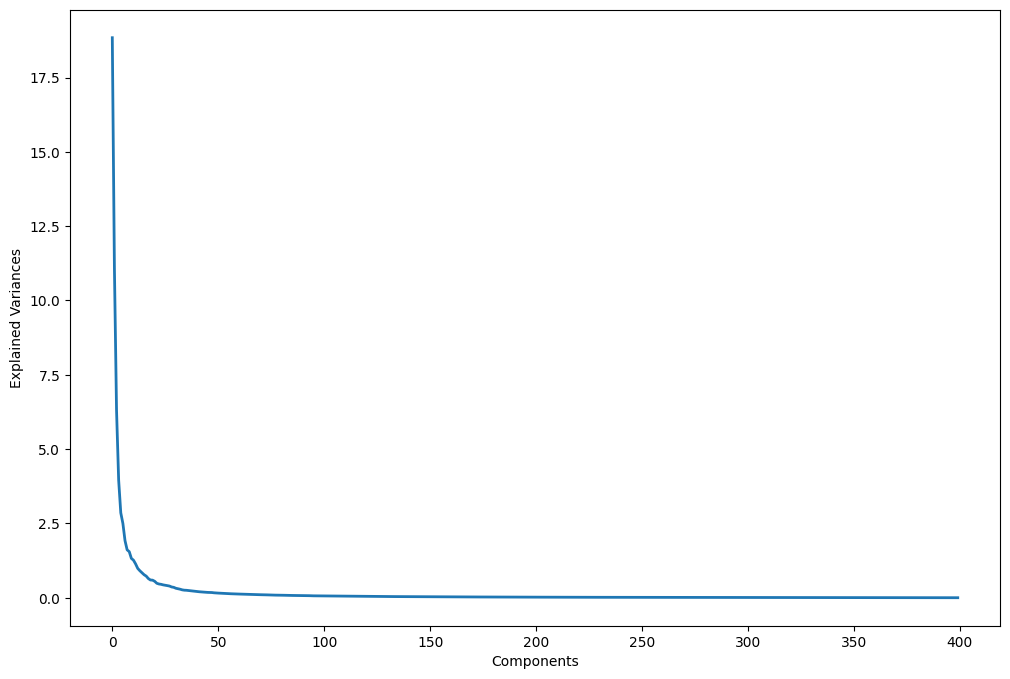

In [15]:
pca = PCA()
pca.fit(features)

plt.figure(1, figsize=(12,8))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()

In [16]:
pca2 = PCA(n_components=100, whiten=True)
pca2.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

IndexError: index 100 is out of bounds for axis 0 with size 100

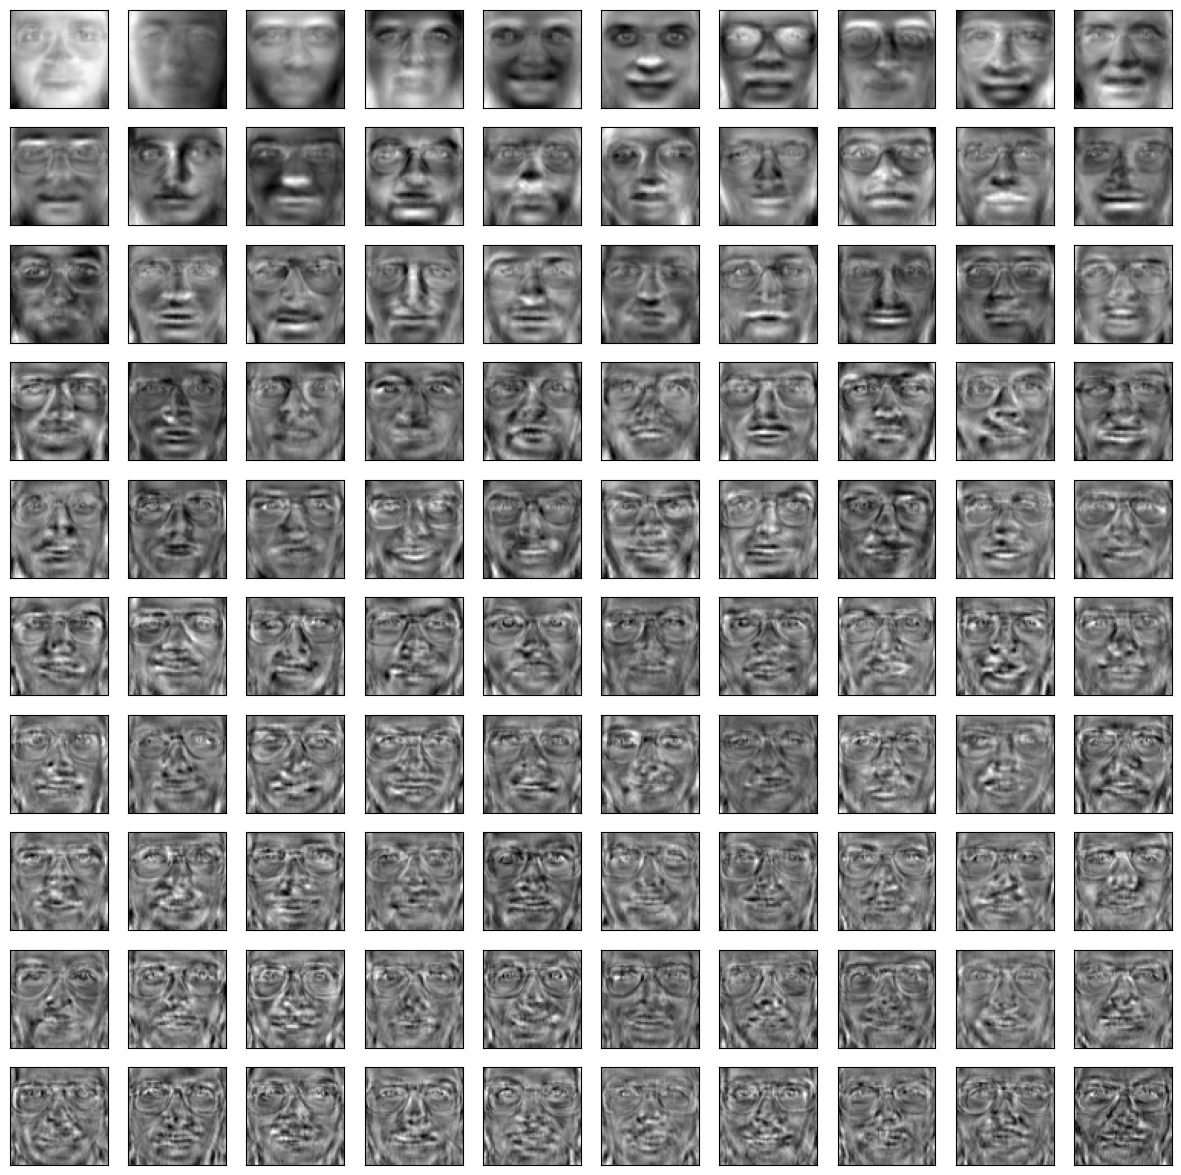

In [18]:
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_of_eigenfaces, 64, 64))

fig, sub_plots = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
sub_plots = sub_plots.flatten()

for i in range(number_of_eigenfaces):
    sub_plots[i].imshow(eigen_faces[i], cmap="gray")
    sub_plots[i].set_xticks([])
    sub_plots[i].set_yticks([])

plt.show()

In [21]:
pca3 = PCA(n_components=100, whiten=True)
pca3.fit(X_train)

X_pca = pca.fit_transform(features)

In [19]:
models = [("Logistic regression", LogisticRegression()), ("Support Vector Machine", SVC()), ("Naive Bayes Classifier", GaussianNB())]

In [22]:
from sklearn.model_selection import KFold

In [23]:
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    cv_scores = cross_val_score(model, X_pca, targets, cv=kfold)
    print("Result with %s" % name)
    print("Accuracy score : %s" % cv_scores.mean())

Result with Logistic regression
Accuracy score : 0.97
Result with Support Vector Machine
Accuracy score : 0.915
Result with Naive Bayes Classifier
Accuracy score : 0.36
